In [1]:
pip install yfinance


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pandas yfinance



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install --upgrade numexpr bottleneck pybind11


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import yfinance as yf

In [5]:
from datetime import datetime

end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [6]:
stock = "GOOG"

google_data = yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-04-11,4.790023,4.828942,4.767466,4.786553,217231195
2005-04-12,4.808119,4.819522,4.695327,4.784321,293881426
2005-04-13,4.782587,4.817043,4.703261,4.795972,263214910
2005-04-14,4.745898,4.818034,4.712433,4.791014,247030473
2005-04-15,4.586008,4.718382,4.577579,4.712433,464831797


In [8]:
google_data.shape

(5032, 5)

In [9]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,50.812195,51.333506,50.279907,50.792994,1.033894e+08
std,48.514504,49.036964,47.998177,48.490324,1.341371e+08
min,4.586008,4.657401,4.548576,4.575597,1.584340e+05
25%,13.551714,13.719042,13.408371,13.567394,2.613600e+07
50%,28.769884,29.001029,28.529672,28.809687,4.807682e+07
75%,69.815073,70.443470,68.897425,69.508151,1.262575e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [10]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-04-11 to 2025-04-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5032 non-null   float64
 1   (High, GOOG)    5032 non-null   float64
 2   (Low, GOOG)     5032 non-null   float64
 3   (Open, GOOG)    5032 non-null   float64
 4   (Volume, GOOG)  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [11]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

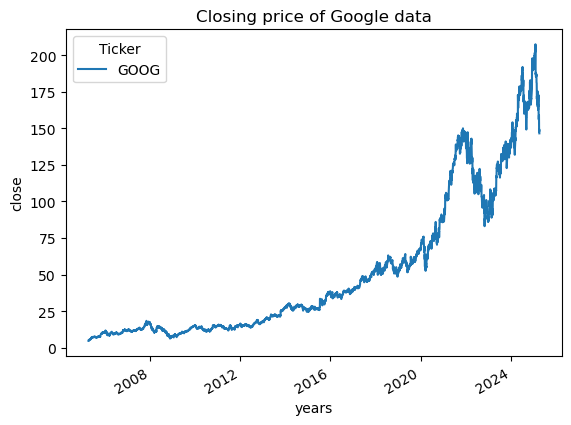

In [13]:
plt.figure(figsize=(15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("close")
plt.title("Closing price of Google data")

In [14]:
def plot_graph(figsize,values,column_name):
    plt.figure(figsize = figsize)
    values.plot()
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [15]:
google_data.columns


MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

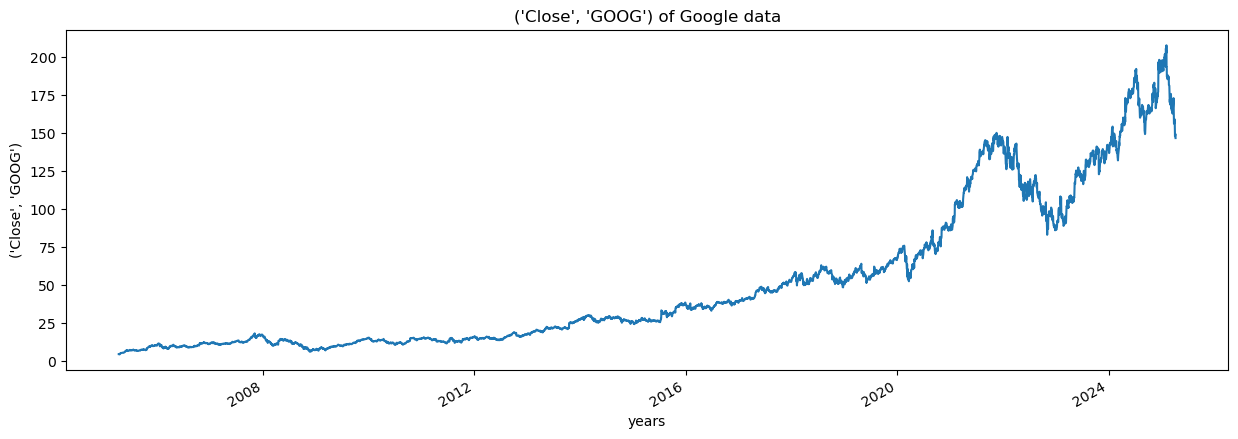

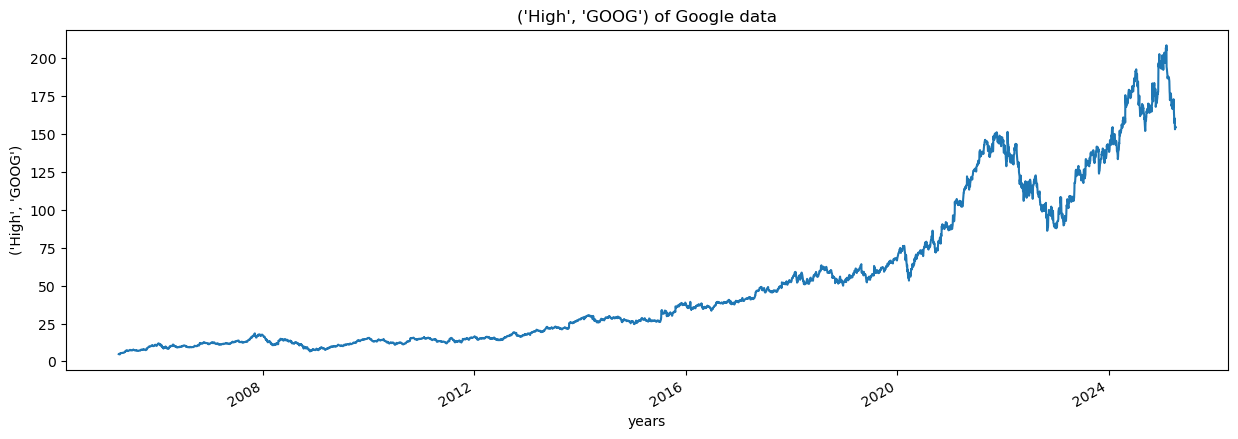

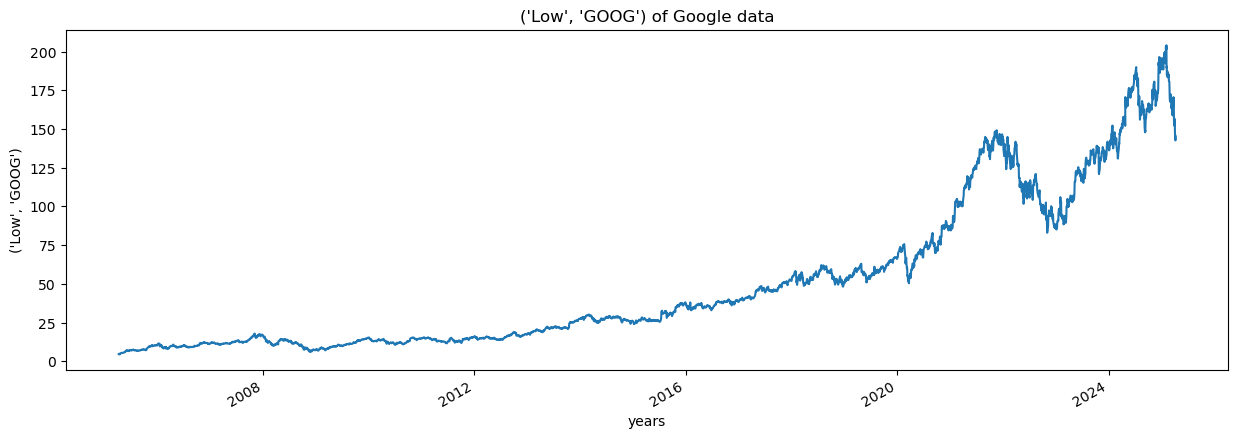

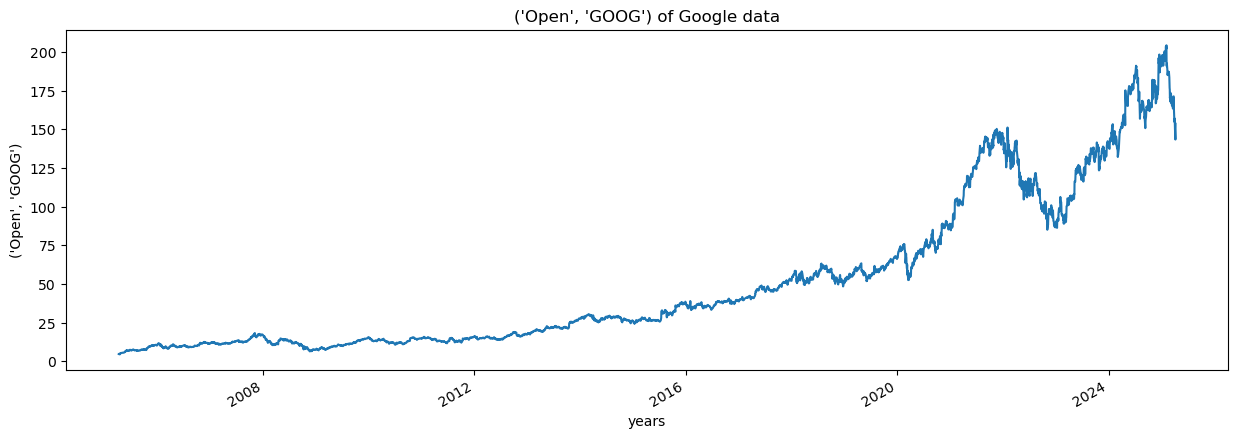

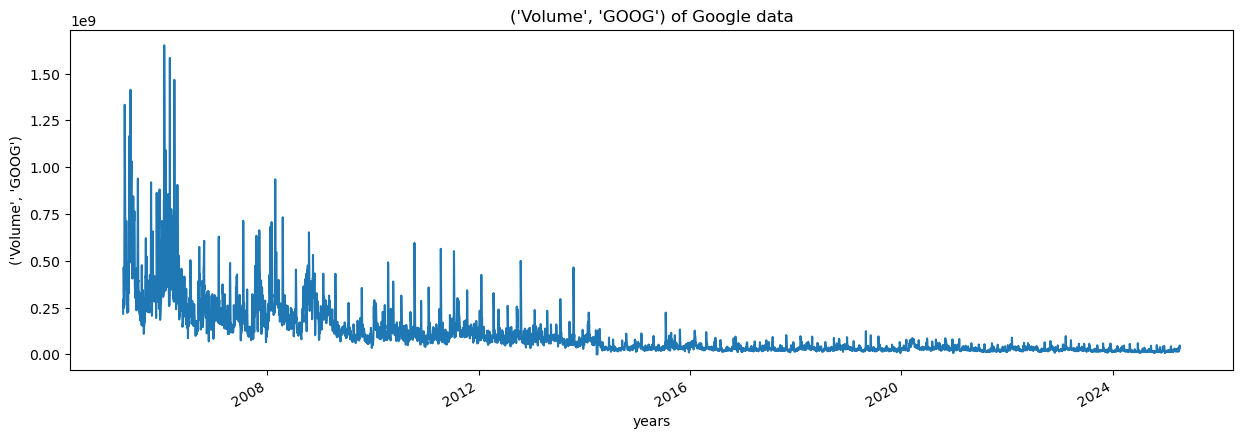

In [16]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [17]:
for i in range(2005,2025):
    print(i,list(google_data.index.year).count(i))

2005 185
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [18]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()

In [19]:
google_data['MA_for_100_days'][0:100].tail()

Date
2005-08-24         NaN
2005-08-25         NaN
2005-08-26         NaN
2005-08-29         NaN
2005-08-30    6.616731
Name: MA_for_100_days, dtype: float64

<Figure size 1500x800 with 0 Axes>

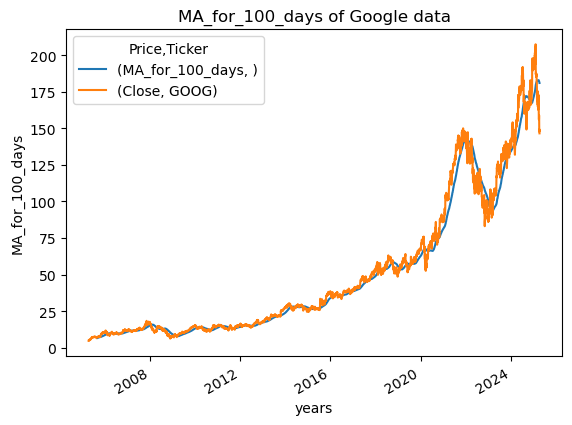

In [20]:
plot_graph((15,8),google_data[['MA_for_100_days','Close']],'MA_for_100_days')

In [21]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-04-11,4.790023,NaN
2005-04-12,4.808119,0.003778
2005-04-13,4.782587,-0.005310
2005-04-14,4.745898,-0.007671
2005-04-15,4.586008,-0.033690


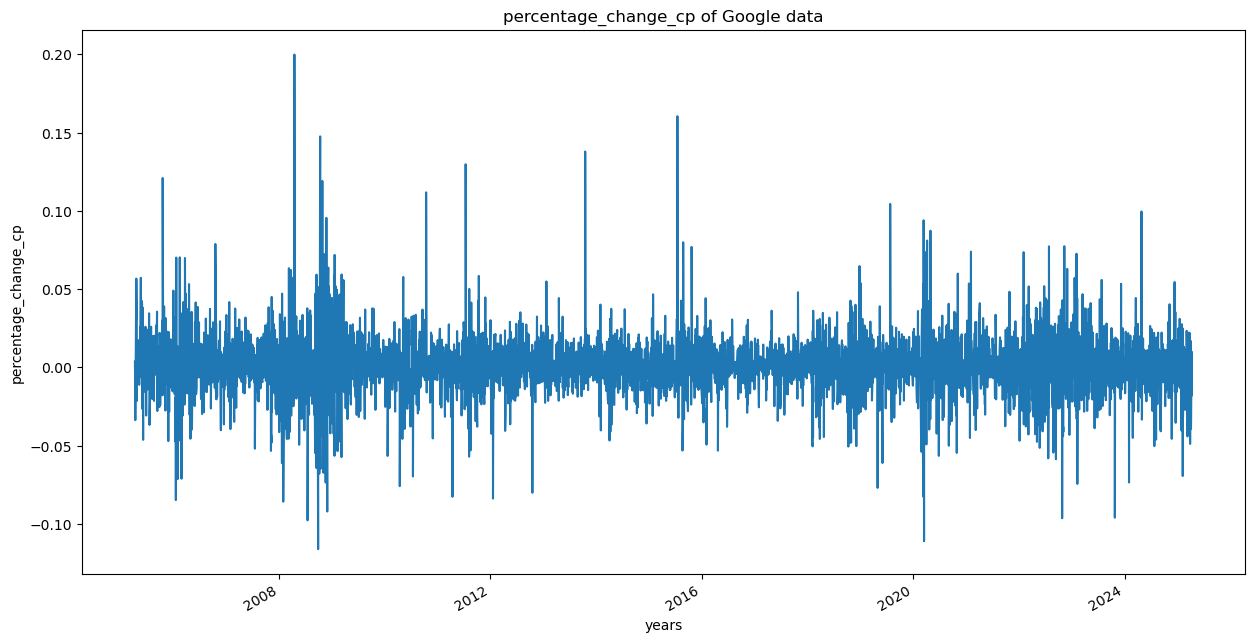

In [22]:
plot_graph((15,8),google_data['percentage_change_cp'],'percentage_change_cp')

In [23]:
close_price = google_data[['Close']]

In [24]:
max(close_price.values), min(close_price.values)

(array([207.47363281]), array([4.5860076]))

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

/Users/jehilthakkar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([[0.00100556],
       [0.00109475],
       [0.00096891],
       ...,
       [0.7055827 ],
       [0.71297595],
       [0.69986523]])

In [26]:
len(scaled_data)

5032

In [27]:
x_data = []
y_data = []

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)


In [28]:
x_data[0], y_data[0]

(array([[0.00100556],
        [0.00109475],
        [0.00096891],
        [0.00078807],
        [0.        ],
        [0.0002407 ],
        [0.00078197],
        [0.00160059],
        [0.00234834],
        [0.00376443],
        [0.00470767],
        [0.00412365],
        [0.00424949],
        [0.00420917],
        [0.00427638],
        [0.00455617],
        [0.00503268],
        [0.00531492],
        [0.0051292 ],
        [0.00525628],
        [0.00501191],
        [0.00522939],
        [0.00565581],
        [0.0053418 ],
        [0.00540534],
        [0.00562648],
        [0.00588063],
        [0.00661738],
        [0.00661982],
        [0.00691673],
        [0.00860773],
        [0.00867493],
        [0.00926263],
        [0.00906591],
        [0.00989675],
        [0.01127374],
        [0.01258475],
        [0.01257253],
        [0.01163906],
        [0.01294397],
        [0.01321033],
        [0.01155354],
        [0.01237827],
        [0.01191275],
        [0.0119433 ],
        [0

In [29]:
int(len(x_data)*0.7)

3452

In [30]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = x_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 100, 1)
(1480, 100, 1)
(1480, 1)


In [32]:
pip install keras



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [36]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
model.fit(x_train,y_train,batch_size = 1, epochs = 2)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 115s 33ms/step - loss: 3.3752e-04
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 112s 32ms/step - loss: 2.2512e-04


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [40]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [41]:
predictions

array([[0.24536471],
       [0.24461651],
       [0.24412295],
       ...,
       [0.59191936],
       [0.58626723],
       [0.58212876]], dtype=float32)

In [42]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 54.36747 ],
       [ 54.21567 ],
       [ 54.115536],
       ...,
       [124.67912 ],
       [123.53238 ],
       [122.69273 ]], dtype=float32)

In [43]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 57.21052551],
       [ 57.29960251],
       [ 56.76961517],
       ...,
       [147.74000549],
       [149.24000549],
       [146.58000183]])

In [46]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [47]:
rmse

23.973358795546517

In [49]:
import pandas as pd

In [51]:
plotting_data = pd.DataFrame(
    {
        'original_test_data' : inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2019-05-21,57.210526,54.367470
2019-05-22,57.299603,54.215672
2019-05-23,56.769615,54.115536
2019-05-24,56.406334,53.973110
2019-05-28,56.440170,53.795940


<Figure size 1500x600 with 0 Axes>

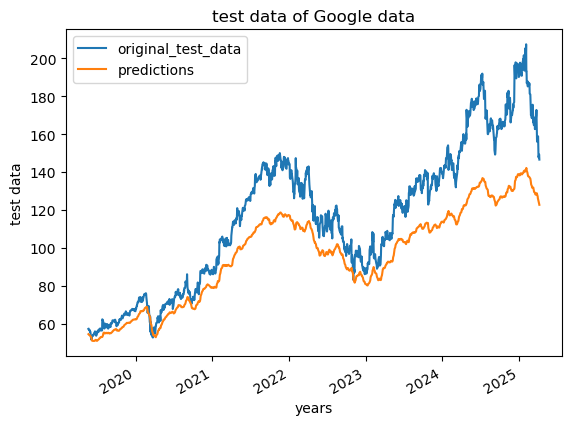

In [52]:
plot_graph((15,6), plotting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

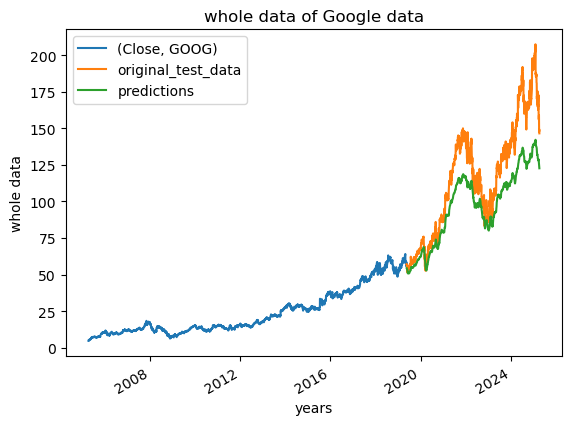

In [55]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100], plotting_data], axis = 0), 'whole data')

In [57]:
model.save("Stock_price_prediction.keras")